<a href="https://colab.research.google.com/github/samiha-mahin/A-Machine-Learning-Models-Repo/blob/main/Voting_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 🌟 **What is Voting Ensemble?**

**Voting Ensemble** is a technique in machine learning where **multiple models (classifiers)** are combined to make a **final prediction**.
It’s like taking advice from **a group of experts** instead of just one.

---

### 🧠 **Why use it?**

Because **no single model** is perfect. Combining different models often leads to **better accuracy and stability**.

---

### 🧩 **How does it work?**

There are **two main types** of voting:

---

#### ✅ 1. **Hard Voting**

* Each model gives a **class label prediction** (e.g., Cat, Dog).
* The final prediction is the one **most models agree on**.
* Example:

  * Model A: **Cat**
  * Model B: **Dog**
  * Model C: **Cat**
  * Final result = **Cat** (because 2 out of 3 chose Cat)

---

#### 🔢 2. **Soft Voting**

* Each model gives **probabilities** for each class (e.g., 70% Cat, 30% Dog).
* The probabilities are **averaged**, and the class with the **highest average** is chosen.
* Better when models give **confidence scores** (like in logistic regression or random forest).

---

### 🧪 Simple Example

Imagine 3 models predicting whether a fruit is an **apple** or **banana**:

| Model | Prediction |
| ----- | ---------- |
| A     | Apple      |
| B     | Banana     |
| C     | Apple      |

* **Hard Voting** = Apple (2 votes)
* **Soft Voting** = Check average probabilities → Choose class with highest probability

---

### ✅ When to use Voting Ensemble?

* When you want to **combine different models** (e.g., Decision Tree, SVM, Logistic Regression)
* When **individual models are decent**, but you want a more **robust** final prediction

---

### 📌 Key Point:

> Voting ensemble is like **group decision-making** in machine learning – combining predictions from multiple models to improve performance.



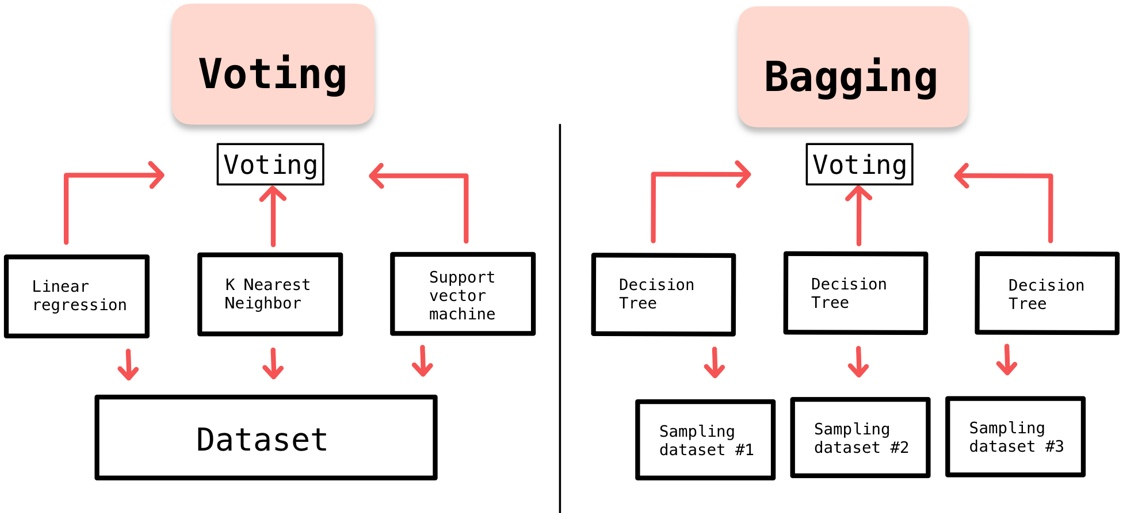

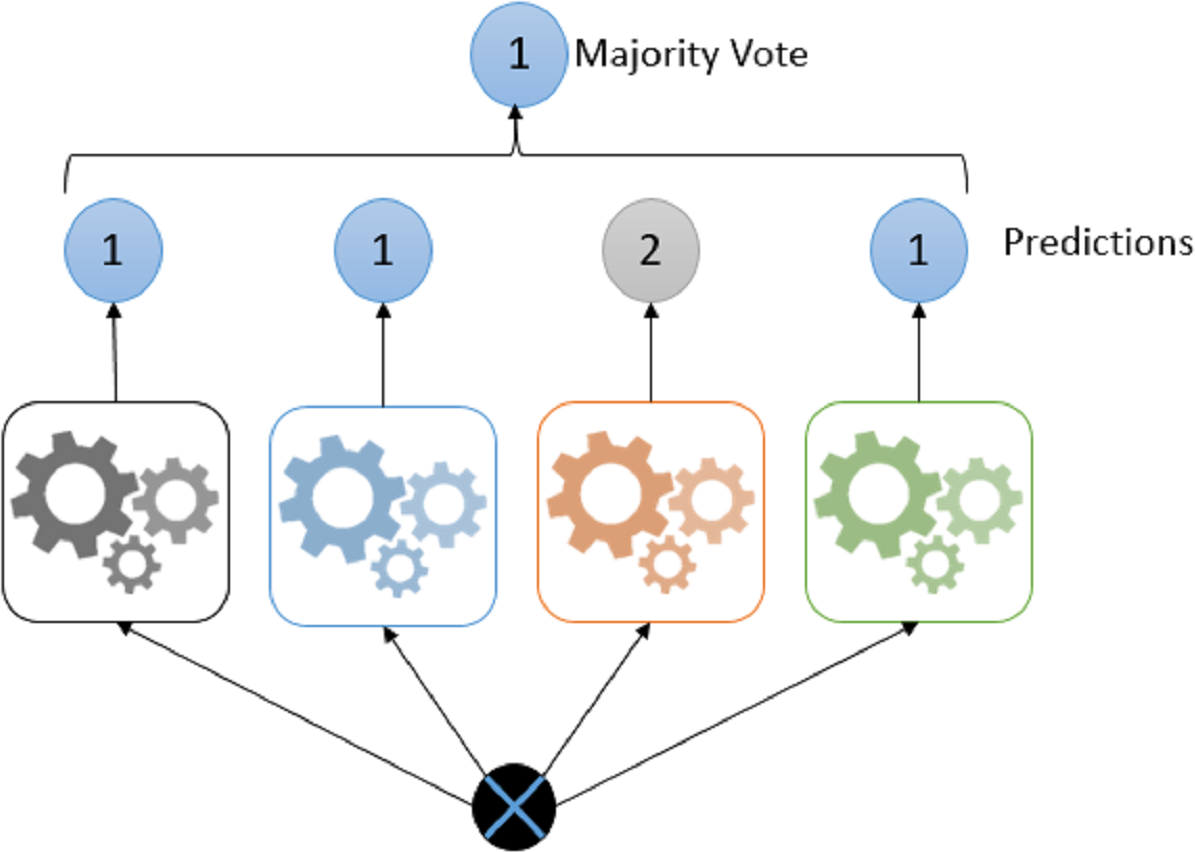

# **1. Titanic Dataset – Voting Classifier**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/content/titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

In [7]:
num_transformer = SimpleImputer(strategy='mean')
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


In [8]:
# Define models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [10]:
#Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr), ('rf', rf), ('xgb', xgb)
], voting='soft')  # 'soft' for better performance

In [11]:
model = Pipeline([
    ('preprocess', preprocessor),
    ('voting', voting_clf)
])

In [12]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy on Titanic: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:54:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy on Titanic: 0.83
